# Loading 2D fields into yt 

`yt_xarray` can also load in 2D fields from xarray into a yt dataset. To do so, all you have to do is provide a selection dictionary that will reduce your chosen field down to 2D. 

First, let's import and create a test dataset:

In [1]:
import xarray as xr
import yt_xarray
import yt
import numpy as np

x = np.linspace(0, 5, 20)
y = np.linspace(0, 5, 15)
z = np.linspace(0, 5, 25)

time = np.linspace(0,10,5)
shp = (x.size, y.size, z.size) 

data = {
        "temp": xr.DataArray(np.random.rand(*shp),
                             coords={"x": x, "y": y, "z": z},
                             dims=("x", "y", "z")),
        "precip": xr.DataArray(np.random.rand(*shp[:-1]),
                               coords={"x": x, "y": y}, dims=("x", "y")),
        
        "precip_t": xr.DataArray(np.random.rand(time.size, x.size, y.size),
                               coords={"time": time, "x": x, "y": y}, 
                                 dims=("time", "x", "y")),
    }

ds = xr.Dataset(data)

loading the `"temp"` field without any selection dictionary will load the full 3D field: 

In [2]:
yt_ds = ds.yt.load_uniform_grid(fields=["temp",], length_unit = 'km')

yt : [INFO     ] 2023-01-11 13:38:53,018 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-11 13:38:53,020 Parameters: domain_dimensions         = [20 15 25]
yt : [INFO     ] 2023-01-11 13:38:53,021 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-11 13:38:53,022 Parameters: domain_right_edge         = [5. 5. 5.]
yt : [INFO     ] 2023-01-11 13:38:53,023 Parameters: cosmological_simulation   = 0


Inferred coordinate type is cartesian -- to override, use ds.yt.set_coordinate_type


In [3]:
print(yt_ds.domain_width)

[5. 5. 5.] code_length


loading in the `"precip"` field, which is two dimensional, which load in the field with a dummy 3rd dimension:

In [4]:
yt_ds = ds.yt.load_uniform_grid(fields=["precip",], length_unit = 'km')

yt : [INFO     ] 2023-01-11 13:38:53,120 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-11 13:38:53,121 Parameters: domain_dimensions         = [20 15  1]
yt : [INFO     ] 2023-01-11 13:38:53,122 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-11 13:38:53,123 Parameters: domain_right_edge         = [5. 5. 1.]
yt : [INFO     ] 2023-01-11 13:38:53,124 Parameters: cosmological_simulation   = 0


In [5]:
print(yt_ds.domain_width)

[5. 5. 1.] code_length


yt : [INFO     ] 2023-01-11 13:38:53,267 xlim = 0.000000 5.000000
yt : [INFO     ] 2023-01-11 13:38:53,268 ylim = 0.000000 5.000000
yt : [INFO     ] 2023-01-11 13:38:53,269 xlim = 0.000000 5.000000
yt : [INFO     ] 2023-01-11 13:38:53,269 ylim = 0.000000 5.000000
yt : [INFO     ] 2023-01-11 13:38:53,274 Making a fixed resolution buffer of (('stream', 'precip')) 800 by 800



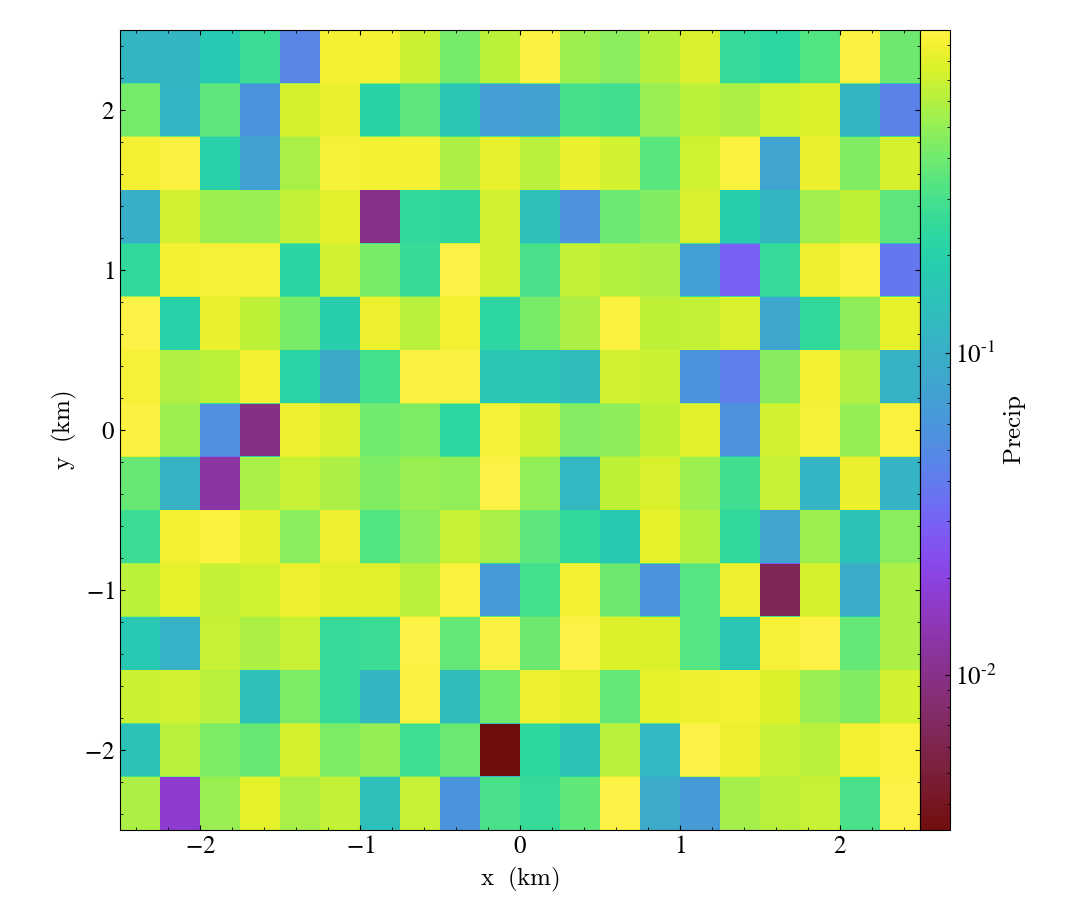

In [6]:
yt.SlicePlot(yt_ds, "z", ("stream", "precip"))

Finally, you can also provide a selection dictionary to reduce a field to 2D. For example, you can load select a timestep to load for `"precip_t"` with:

In [7]:
yt_ds = ds.yt.load_uniform_grid(fields=["precip_t",], length_unit = 'km', geometry="cartesian", sel_dict={'time':0})

yt : [INFO     ] 2023-01-11 13:38:54,153 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-11 13:38:54,155 Parameters: domain_dimensions         = [20 15  1]
yt : [INFO     ] 2023-01-11 13:38:54,156 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-11 13:38:54,157 Parameters: domain_right_edge         = [5. 5. 1.]
yt : [INFO     ] 2023-01-11 13:38:54,158 Parameters: cosmological_simulation   = 0


In [8]:
print(yt_ds.domain_width)

[5. 5. 1.] code_length


yt : [INFO     ] 2023-01-11 13:38:54,268 xlim = 0.000000 5.000000
yt : [INFO     ] 2023-01-11 13:38:54,269 ylim = 0.000000 5.000000
yt : [INFO     ] 2023-01-11 13:38:54,270 xlim = 0.000000 5.000000
yt : [INFO     ] 2023-01-11 13:38:54,271 ylim = 0.000000 5.000000
yt : [INFO     ] 2023-01-11 13:38:54,275 Making a fixed resolution buffer of (('stream', 'precip_t')) 800 by 800



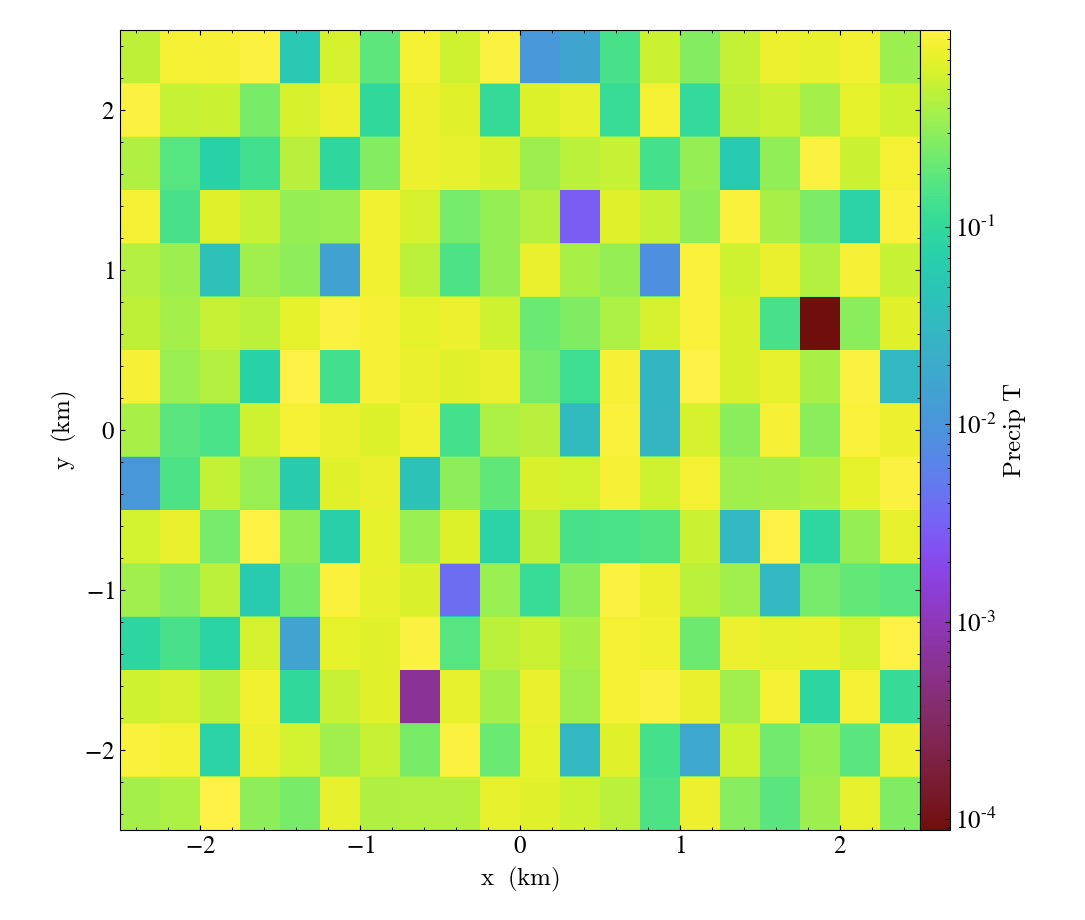

In [9]:
yt.SlicePlot(yt_ds, "z", ("stream", "precip_t"))